##  Python ML Practice 2: Epileptic Seizure Recognition

*NYC Data Science Academy,  Jing Wang,  2017-08*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline


** raw data link: https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition **

## I.Get data

#### 1.1 load the data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv'
data = pd.read_csv(url, na_values='?')
data = data.iloc[:,1:]
data.shape[0]/4097

2.8069319013912617

In [3]:
data.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5


In [4]:
data.shape

(11500, 179)

In [5]:
# combine all y >2 into 0, negative result
data['y1'] = 0
data.loc[data.y==1 , 'y1'] = 1

In [6]:
data.y1.value_counts()

0    9200
1    2300
Name: y1, dtype: int64

#### 1.2 dataset.info() to exam all variable len and type

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, X1 to y1
dtypes: int64(180)
memory usage: 15.8 MB


#### 1.3 use data[columne].value_counts() to check categorical variable

#### 1.4 use dataset.describe() to get general descriptive statistics

In [8]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,y1
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1.000000


#### 1.5 dataset.hist(bins=50, figsize=(20,15)) to check histogram of all numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a4b4550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1233a4f98>]], dtype=object)

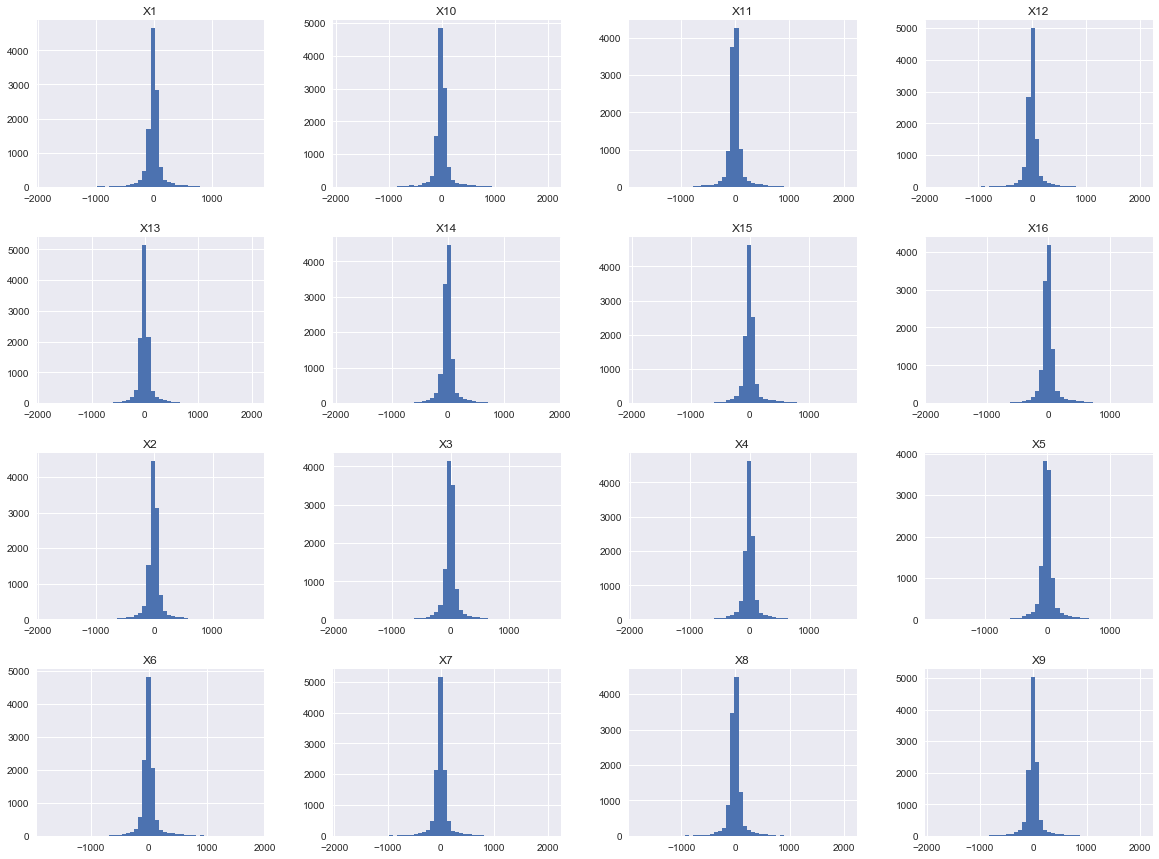

In [9]:
cols= data.columns[:16]
data[cols].hist(bins=50, figsize=(20,15))

## II. Subset of data 

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

#### 2.1 Use sklearn.model_selection module to split the dataset

In [11]:
from sklearn.model_selection import train_test_split

# define the test_size, setup the random_state
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

#### 2.2 define X and y

In [12]:
X_train = train_set.iloc[:,:-2].copy() 
y_train = train_set.iloc[:,-1].copy()

X_test = test_set.iloc[:,:-2].copy() 
y_test = test_set.iloc[:,-1].copy()


print(data.shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(11500, 180)
(9200, 178) (9200,) (2300, 178) (2300,)


In [13]:
# check the weight of y
print(y_train.value_counts()/len(y_train))
print(y_test.value_counts()/len(y_test))

0    0.800543
1    0.199457
Name: y1, dtype: float64
0    0.797826
1    0.202174
Name: y1, dtype: float64


## III. Discover and visualize the data to gain insights¶

In [14]:
train_set2 = train_set.drop('y', 1)

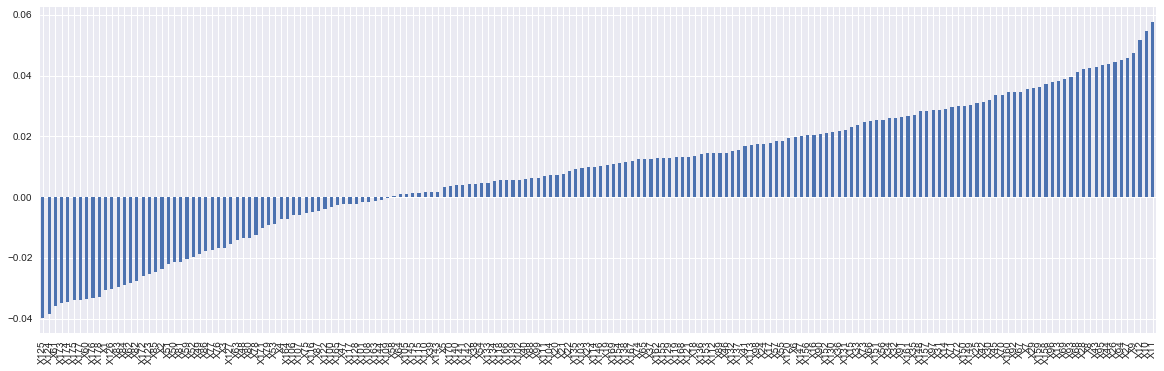

In [95]:
train_set2.corr()['y1'].sort_values()[:-1].plot(kind='bar', figsize=(20,6))

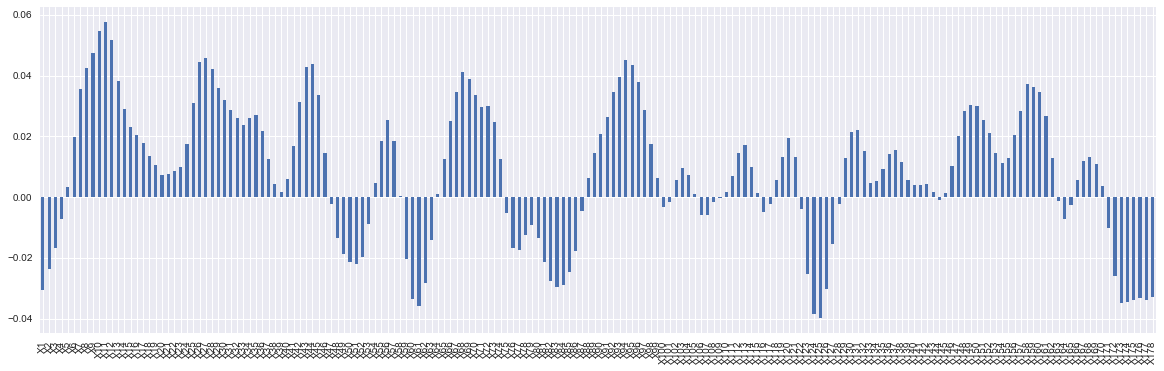

In [94]:
train_set2.corr()['y1'][:-1].plot(kind='bar', figsize=(20,6))

## IV. Prepare the data for Machine Learning algorithms

## V. Select and train a model: SGD, RF, KNN

#### 5.1  Try on binary classifier first with SGDClassifier + CV

In [75]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [76]:
some_row = X_train.loc[10000]
print(sgd_clf.predict([some_row]) )
print(y_train[10000])

[1]
1


In [77]:
#evaluate with CV
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") 

array([ 0.53244213,  0.55265732,  0.53163731])

#### 5.2 Evaluate with confusion_matrix

In [78]:
# 2. confusion matrix to check the accuracy
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[4052, 3313],
       [ 929,  906]])

#### 5.3 Based on Confusion Matrix, check precision and recall

In [80]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.214742830055
0.493732970027


#### 5.4 check f1_socre

In [81]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.29930624380574827

In [82]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.49739130434782608

#### 6.1 Use ensemble.RandomForestClassifier

In [88]:
# 1. Build the forest_elf model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [89]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.925287356322
0.877384196185


In [90]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy") 

array([ 0.96152592,  0.96315618,  0.95955643])

In [91]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[7235,  130],
       [ 225, 1610]])

In [92]:
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9682608695652174

#### 6.2 Plot the ROC curve

In [29]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")


In [30]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

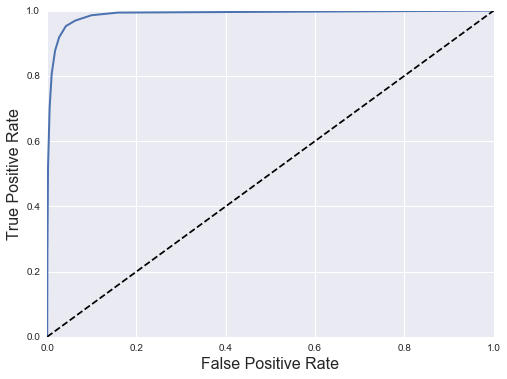

In [31]:
# 2. plot ROC curve of forest model
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

#### 7.1 use KNN classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [33]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.988304093567
0.644686648501


In [34]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy") 

array([ 0.92794261,  0.93348549,  0.92139596])

In [35]:
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[7351,   14],
       [ 652, 1183]])

#### 7.2 Plot the ROC curve

In [36]:
y_probas_knn = cross_val_predict(knn_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [37]:
y_scores_knn = y_probas_knn[:, 1] # score = proba of positive class
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, y_scores_knn)


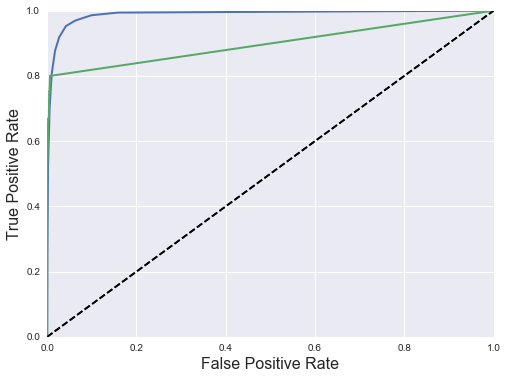

In [38]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

#### 8.1 use Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_train_pred = cross_val_predict(logit, X_train, y_train, cv=3)

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.857566765579
0.157493188011


In [41]:
cross_val_score(logit, X_train, y_train, cv=3, scoring="accuracy") 

array([ 0.82621454,  0.82425823,  0.8297456 ])

In [42]:
y_train_pred = cross_val_predict(logit, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[7317,   48],
       [1546,  289]])

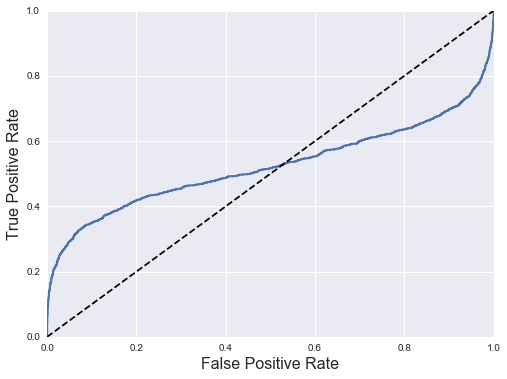

In [43]:
y_probas_logit = cross_val_predict(logit, X_train, y_train, cv=3,
                                    method="predict_proba")
y_scores_logit = y_probas_logit[:, 1] # score = proba of positive class
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_train, y_scores_logit)


plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_logit, tpr_logit)
plt.show()

## VI. Hyperparameter tuning

#### 9.1 GridSearchCV with KNN

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier(random_state=42)
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ... n_neighbors=3, weights=uniform, score=0.930978, total=   5.6s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.0s remaining:    0.0s


[CV] ... n_neighbors=3, weights=uniform, score=0.933152, total=   6.0s
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.2s remaining:    0.0s


[CV] ... n_neighbors=3, weights=uniform, score=0.931522, total=   5.4s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ... n_neighbors=3, weights=uniform, score=0.924457, total=   5.7s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ... n_neighbors=3, weights=uniform, score=0.927717, total=   5.5s
[CV] n_neighbors=3, weights=distance .................................
[CV] .. n_neighbors=3, weights=distance, score=0.930978, total=   5.4s
[CV] n_neighbors=3, weights=distance .................................
[CV] .. n_neighbors=3, weights=distance, score=0.933152, total=   5.8s
[CV] n_neighbors=3, weights=distance .................................
[CV] .. n_neighbors=3, weights=distance, score=0.932065, total=   6.2s
[CV] n_neighbors=3, weights=distance .................................
[CV] .. n_neighbors=3, weights=distance, score=0.925000, total=   6.1s
[CV] n_neighbors=3, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [45]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [46]:
grid_search.best_score_

0.93152173913043479

In [49]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.93304347826086953

In [73]:
y_train_pred = cross_val_predict(grid_search.best_estimator_, X_train, y_train, cv=3)

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.988304093567
0.644686648501


#### 9.2 RandomizedSearchCV with RandomForest

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint


param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

forest_clf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(forest_clf, param_distributions = param_dist, cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3, score=0.958696, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3, score=0.969022, total=   1.1s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3, score=0.966304, total=   1.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3, score=0.961957, total=   1.0s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=8, min_samples_leaf=6, min_samples_split=3, score=0.963587, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=7 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=7, score=0.916848, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_sa

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3, score=0.963587, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3, score=0.956522, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3, score=0.963043, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=4, min_samples_split=3, score=0.962500, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=6, min_samples_leaf=6, min_samples_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.5s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x127b8a978>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126b42748>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126b427f0>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None,

In [53]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [54]:
random_search.best_score_

0.96543478260869564

In [55]:
y_pred = random_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.97260869565217389

In [72]:
y_train_pred = cross_val_predict(random_search.best_estimator_, X_train, y_train, cv=3)

print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.921840354767
0.906267029973


#### 9.3 GridSearchCV with RandomForest

In [59]:
forest_clf = RandomForestClassifier(random_state=42)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


grid_search_forest = GridSearchCV(forest_clf, param_grid=param_grid, cv=5, verbose=3)
grid_search_forest.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.914674, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.923370, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.911413, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.920109, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.911957, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.914674, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.923370, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.920109, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.911957, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.914674, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.923913, total=   0.0s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  b

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.923913, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.908152, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.914130, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.917935, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootst

[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.918478, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.929891, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.922826, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.922283, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootst

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.962500, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.957065, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.964130, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, score=0.952174, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.963043, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.951087, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.957065, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.960326, total=   0.1s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.959783, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.957609, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.964130, total=   0.2s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.955978, total=   0.3s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=10, min_sampl

[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.963587, total=   0.8s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.966304, total=   0.8s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.969022, total=   0.8s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.960870, total=   0.8s
[CV] bootstrap=True, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_sampl

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.914674, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.919022, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.910870, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=10, score=0.911413, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.919022, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.910870, total=   0.0s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, score=0.915217, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, score=0.917391, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=1, min_samples

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.917391, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.919565, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.922283, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.913043, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, min_sampl

[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.921196, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.922826, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.920109, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3, score=0.921739, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_sampl

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.959783, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, score=0.955435, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, score=0.960326, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=10, score=0.955435, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_sam

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.957609, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.954348, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.951630, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.963043, total=   0.1s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=3,

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.952717, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.961957, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.955978, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.960870, total=   0.2s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=3, min_sa

[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.964130, total=   0.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.964674, total=   0.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.958152, total=   0.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.963043, total=   0.6s
[CV] bootstrap=True, criterion=entropy, max_depth=None, max_features=10, min_s

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.911957, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.911957, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.914674, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.919022, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootst

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.911957, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.914674, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.919022, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.917391, total=   0.0s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=1

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.923913, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.914674, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.906522, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2, score=0.912500, total=   0.1s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=2 
[CV]

[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.919565, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.918478, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.920652, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.913587, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=3 
[CV]

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.965761, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.961957, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.963043, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.957609, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=1, min_sampl

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.956522, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.955435, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.961413, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.959239, total=   0.2s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=1, min_samples_leaf=10,

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.964674, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.967391, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.964130, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.961957, total=   0.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=3, min_samples_leaf=3, mi

[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, score=0.963043, total=   1.6s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, score=0.969565, total=   1.5s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.960870, total=   1.3s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.970652, total=   1.4s
[CV] bootstrap=False, criterion=gini, max_depth=None, max_features=10, min_samples_leaf=3

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.913587, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.911413, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.913043, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.916848, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1, min_sampl

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.911413, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.913043, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.916848, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=10, min_samples_split=10, score=0.916848, total=   0.0s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=1, min_samples_leaf=1

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.913587, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.919565, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.922283, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.916304, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=3, min_samples_leaf=10, m

[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.914130, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.920652, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.922283, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, min_samples_split=2, score=0.920109, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=3, max_features=10, min_samples_leaf=3, m

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.952717, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, score=0.963587, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.956522, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, score=0.965761, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_s

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.956522, total=   0.2s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.965761, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.955435, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=1, min_samples_leaf=10, min_samples_split=3, score=0.958696, total=   0.1s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=1

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, score=0.960870, total=   0.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, score=0.960326, total=   0.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, score=0.966304, total=   0.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=10, score=0.962500, total=   0.3s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=3, min

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=3, score=0.964674, total=   1.0s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, score=0.963043, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, score=0.967391, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=1, min_samples_split=10, score=0.960870, total=   0.8s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_feat

[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, score=0.965761, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, score=0.960870, total=   0.9s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, score=0.960326, total=   0.8s
[CV] bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10 
[CV]  bootstrap=False, criterion=entropy, max_depth=None, max_features=10, min_samples_leaf=10, min_samples_split=10, score=0.958696, total=   0.8s


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [61]:
grid_search_forest.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [62]:
grid_search_forest.best_score_

0.96717391304347822

In [63]:
y_pred = grid_search_forest.predict(X_test)
accuracy_score(y_test, y_pred)

0.97521739130434781

In [68]:
y_train_pred = cross_val_predict(grid_search_forest.best_estimator_, X_train, y_train, cv=3)
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.920687742651
0.904632152589


##### Plot the ROC curve

In [69]:
y_probas_gs_forest = cross_val_predict(grid_search_forest.best_estimator_, X_train, y_train, cv=3,
                                    method="predict_proba")

In [70]:
y_scores_gs_forest = y_probas_gs_forest[:, 1] 
fpr_gs_forest, tpr_gs_forest, thresholds_gs_forest = roc_curve(y_train, y_scores_gs_forest)


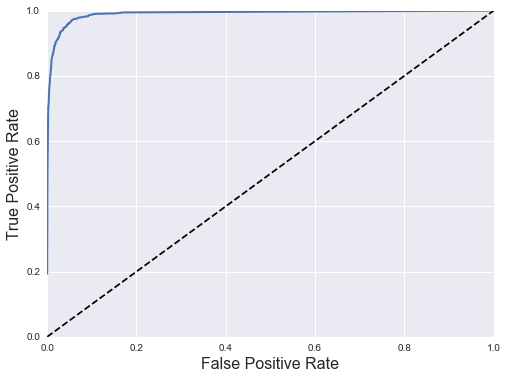

In [71]:
plt.figure(figsize=(8, 6))

plot_roc_curve(fpr_gs_forest, tpr_gs_forest)
plt.show()

## VII. Summary

In [65]:
grid_search_forest.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)